<a href="https://colab.research.google.com/github/ShannQualls/2025-HUDS-Bootcamp/blob/main/Copy_of_NBA_Dataset_Team_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Research Question**

What is the relationship between minutes played and points scored?

Does more playing time during an NBA basketball game consistently lead to higher point totals?

**Problem Statement**

In the National Basketball Association games, it is often viewed that a player who has more playing time consistentenly leads to higher point totals.  However, there may be factors that may reject the hypothesis that more playing time leads to higher point totals. These include and not limited to the players role on the team, the defensive matchups and the efficiency or how well the player plays.  This research will seek to examine the hypothesis that NBA players who receive more playing time will consistently score more points than those who play fewer minutes.

**Data Definition**

**NBA-Data-2010-2024 **

Last Updated: April 29, 2024

https://github.com/NocturneBear/NBA-Data-2010-2024/tree/main

This dataset consists of CSV files that provide comprehensive NBA data spanning from 2010 to 2024, offering valuable insights into player statistics, team performances, game outcomes, and more.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [ ]:
# Import the libraries
import numpy as np                  # Scientific Computing
import pandas as pd                 # Data Analysis
import matplotlib.pyplot as plt     # Plotting
import seaborn as sns               # Statistical Data Visualization

# Check that Pandas returns all the rows and columns for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Pandas display full numbers instead of scientific notation
# pd.options.display.float_format = '{:.0f}'.format

# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries
# import numpy as np
# import pandas as pd

# # Set the path
# path = "/Users/laketakemp/Desktop/Data/NBA Data 2010 2024/"

# # Create the files
# nba_season_data1 = path + "regular_season_box_scores_2010_2024_part_1.csv"
# nba_season_data2 = path + "regular_season_box_scores_2010_2024_part_2.csv"
# nba_season_data3 = path + "regular_season_box_scores_2010_2024_part_3.csv"

**Read the Dataset**

In [ ]:
 #Read the dataset
path ='/content/drive/MyDrive/NBA Dataset/'

# Create the files
nba_season_data1 = path + "regular_season_box_scores_2010_2024_part_1.csv"
nba_season_data2 = path + "regular_season_box_scores_2010_2024_part_2.csv"
nba_season_data3 = path + "regular_season_box_scores_2010_2024_part_3.csv"

# Create the Dataframe
nba_season1 = pd.read_csv(nba_season_data1)
nba_season2 = pd.read_csv(nba_season_data2)
nba_season3 = pd.read_csv(nba_season_data3)
#nbastats = pd.DataFrame(path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/NBA Dataset/regular_season_box_scores_2010_2024_part_1.csv'

In [ ]:
nba_season1.head(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2010-11,2010-11-10,21000112,NJN @ CLE,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,NaN,NaN,4:21,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,-4
1,2010-11,2010-11-17,21000165,NJN @ UTA,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
2,2010-11,2010-11-27,21000237,NJN @ PHI,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
3,2010-11,2010-12-12,21000351,NJN vs. LAL,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
4,2010-11,2010-10-29,21000020,NJN vs. SAC,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,9:53,1,1,1.0,0,0,0.0,0,0,0.0,0,1,1,1,0,0,1,1,2,6
5,2010-11,2010-12-14,21000361,NJN vs. PHI,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
6,2010-11,2010-10-31,21000040,NJN vs. MIA,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:16,0,2,0.0,0,0,0.0,0,0,0.0,1,0,1,0,0,0,1,1,0,-8


In [ ]:
nba_season2.head(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2010-11,2010-12-11,21000347,HOU vs. CLE,1610612745,Houston,Rockets,HOU,rockets,2449,Luis Scola,F,NaN,NaN,28:28,6,13,0.462,0,0,0.0,2,2,1.000,6,8,14,1,1,0,4,3,14,10
1,2010-11,2010-11-19,21000173,HOU @ TOR,1610612745,Houston,Rockets,HOU,rockets,2449,Luis Scola,F,NaN,NaN,36:18,8,19,0.421,0,0,0.0,3,4,0.750,1,4,5,3,1,1,2,3,19,0
2,2011-12,2012-03-18,21100667,HOU @ PHX,1610612745,Houston,Rockets,HOU,rockets,2449,Luis Scola,F,NaN,NaN,24:42,7,13,0.538,0,0,0.0,4,4,1.000,3,4,7,3,0,0,0,2,18,-6
3,2010-11,2010-12-22,21000429,HOU @ LAC,1610612745,Houston,Rockets,HOU,rockets,2449,Luis Scola,F,NaN,NaN,36:23,10,21,0.476,0,0,0.0,2,2,1.000,1,2,3,2,2,2,4,5,22,-3
4,2010-11,2011-02-22,21000840,HOU @ DET,1610612745,Houston,Rockets,HOU,rockets,2449,Luis Scola,F,NaN,NaN,27:34,4,15,0.267,0,1,0.0,0,0,0.000,3,6,9,1,1,2,3,3,8,1
5,2010-11,2010-11-16,21000156,HOU vs. CHI,1610612745,Houston,Rockets,HOU,rockets,2449,Luis Scola,F,NaN,NaN,37:51,11,17,0.647,0,0,0.0,5,6,0.833,2,3,5,3,2,2,2,5,27,23
6,2010-11,2011-01-08,21000543,HOU vs. UTA,1610612745,Houston,Rockets,HOU,rockets,2449,Luis Scola,F,NaN,NaN,44:16,9,17,0.529,0,0,0.0,6,8,0.750,3,7,10,4,1,0,3,6,24,-12


In [ ]:
nba_season3.head(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2015-16,2016-02-25,21500857,OKC @ NOP,1610612760,Oklahoma City,Thunder,OKC,thunder,2555,Nick Collison,NaN,NaN,NaN,4:02,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,1,0,0,0,0,0,1
1,2017-18,2017-12-07,21700365,OKC @ BKN,1610612760,Oklahoma City,Thunder,OKC,thunder,2555,Nick Collison,NaN,NaN,NaN,7:40,1,2,0.500,0,0,0.0,0,0,0.0,2,1,3,1,0,0,1,0,2,4
2,2012-13,2012-12-31,21200456,OKC vs. PHX,1610612760,Oklahoma City,Thunder,OKC,thunder,2555,Nick Collison,NaN,NaN,NaN,19:48,5,6,0.833,0,0,0.0,0,0,0.0,4,5,9,2,1,0,1,2,10,-5
3,2013-14,2013-12-29,21300450,OKC vs. HOU,1610612760,Oklahoma City,Thunder,OKC,thunder,2555,Nick Collison,NaN,NaN,NaN,13:14,2,5,0.400,0,0,0.0,0,0,0.0,1,4,5,3,0,0,1,1,4,5
4,2017-18,2017-12-16,21700431,OKC @ NYK,1610612760,Oklahoma City,Thunder,OKC,thunder,2555,Nick Collison,NaN,NaN,NaN,9:20,1,1,1.000,0,0,0.0,1,2,0.5,0,1,1,0,0,0,0,2,3,-4
5,2012-13,2013-03-10,21200934,OKC vs. BOS,1610612760,Oklahoma City,Thunder,OKC,thunder,2555,Nick Collison,NaN,NaN,NaN,24:35,3,5,0.600,0,0,0.0,2,2,1.0,1,4,5,2,0,1,2,2,8,6
6,2011-12,2012-02-22,21100490,OKC vs. BOS,1610612760,Oklahoma City,Thunder,OKC,thunder,2555,Nick Collison,NaN,DND - Left Quad Contusion,NaN,NaN,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Concatenate the files
nba_season_2010_2024 = pd.concat([nba_season1, nba_season2, nba_season3], axis=0, join='outer', ignore_index=True)

# Check the join
#nba_season_2010_2024.head()

In [ ]:
# Display the first seven rows of the dataframe
nba_season_2010_2024.head(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2010-11,2010-11-10,21000112,NJN @ CLE,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,NaN,NaN,4:21,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,-4
1,2010-11,2010-11-17,21000165,NJN @ UTA,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
2,2010-11,2010-11-27,21000237,NJN @ PHI,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
3,2010-11,2010-12-12,21000351,NJN vs. LAL,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
4,2010-11,2010-10-29,21000020,NJN vs. SAC,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,9:53,1,1,1.0,0,0,0.0,0,0,0.0,0,1,1,1,0,0,1,1,2,6
5,2010-11,2010-12-14,21000361,NJN vs. PHI,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
6,2010-11,2010-10-31,21000040,NJN vs. MIA,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:16,0,2,0.0,0,0,0.0,0,0,0.0,1,0,1,0,0,0,1,1,0,-8


In [ ]:
# Display the last seven rows of the dataframe
nba_season_2010_2024.tail(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
424471,2023-24,2024-03-31,22301081,WAS vs. MIA,1610612764,Washington,Wizards,WAS,wizards,1641774,Tristan Vukcevic,NaN,NaN,NaN,13:20,1,3,0.333,1,2,0.5,0,0,0.0,0,2,2,2,0,0,0,3,3,4
424472,2023-24,2024-01-20,22300594,WAS vs. SAS,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
424473,2023-24,2024-01-25,22300628,WAS vs. UTA,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,NaN,NaN,0:50,0,0,0.000,0,0,0.0,0,0,0.0,0,1,1,0,0,0,0,0,0,0
424474,2023-24,2024-01-21,22300602,WAS vs. DEN,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
424475,2023-24,2024-01-29,22300665,WAS @ SAS,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
424476,2023-24,2024-01-24,22300620,WAS vs. MIN,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,NaN,NaN,0:39,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,1,0,0,3
424477,2023-24,2024-01-27,22300642,WAS @ DET,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,DNP - Coach's Decision,NaN,NaN,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# display the dimensions of the data
nba_season_2010_2024.shape

(424478, 34)

In [ ]:
# the basic information about the dataset
nba_season_2010_2024.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424478 entries, 0 to 424477
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   season_year              424478 non-null  object 
 1   game_date                424478 non-null  object 
 2   gameId                   424478 non-null  int64  
 3   matchup                  424478 non-null  object 
 4   teamId                   424478 non-null  int64  
 5   teamCity                 424478 non-null  object 
 6   teamName                 424478 non-null  object 
 7   teamTricode              424478 non-null  object 
 8   teamSlug                 424478 non-null  object 
 9   personId                 424478 non-null  int64  
 10  personName               424478 non-null  object 
 11  position                 166580 non-null  object 
 12  comment                  73005 non-null   object 
 13  jerseyNum                0 non-null       float64
 14  minu

#7. Determine the number of null values and explain your options for treating them. Then, treat your data for null values. This could involve sourcing the data from an alternative location and mapping it to the missing values, imputing the null values with the mean or median, or dropping the values from your dataframe if they have no impact on your analysis. Be sure to explain which method you selected, the benefits and possible detriments to your analysis, and why that method was the best for your data.



**Explanation of Options for treating the Null Values**


jerseyNum                  100.00

comment                     82.80

position                    60.76

minutes                     17.20

Due to the null values in the minutes column being more than 5%, we think it is best to drop the data for the missing or null minutes in order to accurately determine the true impact of the number of points scored and its correlation with the number of minutes played.  If we utilized the mean, it would distort the data we receive and make it inconclusive since everyone would have an average score versus the minutes played.

In [ ]:
# Determine the number of missing values
nba_season_2010_2024.isnull().sum()

,0
season_year,0
game_date,0
gameId,0
matchup,0
teamId,0
teamCity,0
teamName,0
teamTricode,0
teamSlug,0
personId,0


In [ ]:
# Let's create a function to determine the percentage of missing values
# Typically less than five percent missing values may not affect the results
# More than 5% can be dropped, replaced with existing data, or imputed using mean or median.
def missing(DataFrame):
    print ('Percentage of missing values in the dataset:\n',
           round((DataFrame.isnull().sum() * 100/ len(DataFrame)),2).sort_values(ascending=False))

# Call the function and execute
missing(nba_season_2010_2024)

Percentage of missing values in the dataset:
 jerseyNum                  100.00
comment                     82.80
position                    60.76
minutes                     17.20
game_date                    0.00
season_year                  0.00
gameId                       0.00
matchup                      0.00
teamId                       0.00
teamCity                     0.00
personId                     0.00
teamSlug                     0.00
teamTricode                  0.00
teamName                     0.00
personName                   0.00
fieldGoalsMade               0.00
fieldGoalsAttempted          0.00
fieldGoalsPercentage         0.00
threePointersMade            0.00
threePointersAttempted       0.00
threePointersPercentage      0.00
freeThrowsMade               0.00
freeThrowsAttempted          0.00
freeThrowsPercentage         0.00
reboundsOffensive            0.00
reboundsDefensive            0.00
reboundsTotal                0.00
assists                      0.00
st

In [ ]:
#Drop the rows
#nba_season_2010_2024.dropna(axis=0, how='any', inplace=True)
nba_season_2010_2024.dropna(subset=['minutes'], inplace=True)
# Check the null count again
nba_season_2010_2024.isnull().sum()


,0
season_year,0
game_date,0
gameId,0
matchup,0
teamId,0
teamCity,0
teamName,0
teamTricode,0
teamSlug,0
personId,0


In [ ]:
nba_season_2010_2024.head(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2010-11,2010-11-10,21000112,NJN @ CLE,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,NaN,NaN,4:21,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,-4
4,2010-11,2010-10-29,21000020,NJN vs. SAC,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,9:53,1,1,1.000,0,0,0.0,0,0,0.0,0,1,1,1,0,0,1,1,2,6
6,2010-11,2010-10-31,21000040,NJN vs. MIA,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:16,0,2,0.000,0,0,0.0,0,0,0.0,1,0,1,0,0,0,1,1,0,-8
7,2010-11,2010-10-27,21000005,NJN vs. DET,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:25,0,1,0.000,0,0,0.0,0,0,0.0,0,1,1,0,0,0,0,1,0,-1
14,2011-12,2012-03-16,21100644,NJN @ ORL,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,F,NaN,NaN,17:52,4,6,0.667,3,5,0.6,0,0,0.0,1,3,4,1,1,0,1,1,11,-10
15,2011-12,2012-04-21,21100949,NJN @ MIL,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,NaN,NaN,NaN,9:23,1,2,0.500,1,2,0.5,0,0,0.0,0,1,1,0,0,0,1,2,3,0
16,2011-12,2012-02-15,21100432,NJN vs. MEM,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,F,NaN,NaN,17:31,0,5,0.000,0,3,0.0,0,0,0.0,0,3,3,2,1,0,1,2,0,-3


Generate at least one new feature for your data from the existing data in your dataframe. Use existing data to add a new dimension to your data, either by computing a new value variable, parsing out a date or other feature, or mapping a new feature to the data based on a location.
Make sure all code cells are executed. This is indicated by a number in the brackets next to the cell. Cells without a number will be assumed written but not executed and will not receive credit.

Data Exploration

In [ ]:
#Describe the descriptive stats
nba_season_2010_2024.describe(include=object)

# Note: If we do not pass include=object to the describe(), it would return statistics for numeric variables only

,season_year,game_date,matchup,teamCity,teamName,teamTricode,teamSlug,personName,position,comment,minutes
count,351473,351473,351473,351473,351473,351473,351473,351473,166580,0,351473
unique,14,2210,1972,31,31,32,31,1709,3,0,3159
top,2023-24,2024-04-14,SAS @ MEM,Los Angeles,Spurs,SAS,spurs,DeMar DeRozan,F,NaN,12:00
freq,26401,344,317,15625,12551,12551,12551,1033,66632,NaN,984


In [ ]:
newnba=nba_season_2010_2024.copy()

In [ ]:
print(newnba['minutes'].dtype)

object


In [ ]:
newnba.head(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints
0,2010-11,2010-11-10,21000112,NJN @ CLE,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,NaN,NaN,4:21,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,-4
4,2010-11,2010-10-29,21000020,NJN vs. SAC,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,9:53,1,1,1.000,0,0,0.0,0,0,0.0,0,1,1,1,0,0,1,1,2,6
6,2010-11,2010-10-31,21000040,NJN vs. MIA,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:16,0,2,0.000,0,0,0.0,0,0,0.0,1,0,1,0,0,0,1,1,0,-8
7,2010-11,2010-10-27,21000005,NJN vs. DET,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:25,0,1,0.000,0,0,0.0,0,0,0.0,0,1,1,0,0,0,0,1,0,-1
14,2011-12,2012-03-16,21100644,NJN @ ORL,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,F,NaN,NaN,17:52,4,6,0.667,3,5,0.6,0,0,0.0,1,3,4,1,1,0,1,1,11,-10
15,2011-12,2012-04-21,21100949,NJN @ MIL,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,NaN,NaN,NaN,9:23,1,2,0.500,1,2,0.5,0,0,0.0,0,1,1,0,0,0,1,2,3,0
16,2011-12,2012-02-15,21100432,NJN vs. MEM,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,F,NaN,NaN,17:31,0,5,0.000,0,3,0.0,0,0,0.0,0,3,3,2,1,0,1,2,0,-3


In [ ]:
newnba.tail(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints,minutes_float
424465,2023-24,2024-03-25,22301037,WAS @ CHI,1610612764,Washington,Wizards,WAS,wizards,1641774,Tristan Vukcevic,NaN,NaN,NaN,9:00,2,5,0.400,2,4,0.500,0,0,0.000,0,3,3,0,0,0,1,2,6,-5,NaN
424468,2023-24,2024-03-23,22301022,WAS vs. TOR,1610612764,Washington,Wizards,WAS,wizards,1641774,Tristan Vukcevic,NaN,NaN,NaN,3:00,0,0,0.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,0,0,0,-2,NaN
424469,2023-24,2024-04-02,22301095,WAS vs. MIL,1610612764,Washington,Wizards,WAS,wizards,1641774,Tristan Vukcevic,NaN,NaN,NaN,31:03,5,11,0.455,1,6,0.167,3,3,1.000,1,6,7,3,1,0,1,4,14,6,NaN
424470,2023-24,2024-04-12,22301172,WAS vs. CHI,1610612764,Washington,Wizards,WAS,wizards,1641774,Tristan Vukcevic,C,NaN,NaN,22:15,5,11,0.455,2,7,0.286,7,9,0.778,0,1,1,1,1,1,3,4,19,10,NaN
424471,2023-24,2024-03-31,22301081,WAS vs. MIA,1610612764,Washington,Wizards,WAS,wizards,1641774,Tristan Vukcevic,NaN,NaN,NaN,13:20,1,3,0.333,1,2,0.500,0,0,0.000,0,2,2,2,0,0,0,3,3,4,NaN
424473,2023-24,2024-01-25,22300628,WAS vs. UTA,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,NaN,NaN,0:50,0,0,0.000,0,0,0.000,0,0,0.000,0,1,1,0,0,0,0,0,0,0,NaN
424476,2023-24,2024-01-24,22300620,WAS vs. MIN,1610612764,Washington,Wizards,WAS,wizards,1641998,Trey Jemison,NaN,NaN,NaN,0:39,0,0,0.000,0,0,0.000,0,0,0.000,0,0,0,0,0,0,1,0,0,3,NaN


In [ ]:

# Step 1: Convert string to timedelta (assuming MM:SS format)
newnba['timeinmin'] = pd.to_timedelta('00:' + newnba['minutes'])

# Step 2: Convert to total seconds or minutes
newnba['total_seconds'] = newnba['timeinmin'].dt.total_seconds()
newnba['total_minutes'] = newnba['total_seconds'] / 60

newnba.head(7)

,season_year,game_date,gameId,matchup,teamId,teamCity,teamName,teamTricode,teamSlug,personId,personName,position,comment,jerseyNum,minutes,fieldGoalsMade,fieldGoalsAttempted,fieldGoalsPercentage,threePointersMade,threePointersAttempted,threePointersPercentage,freeThrowsMade,freeThrowsAttempted,freeThrowsPercentage,reboundsOffensive,reboundsDefensive,reboundsTotal,assists,steals,blocks,turnovers,foulsPersonal,points,plusMinusPoints,timeinmin,total_seconds,total_minutes
0,2010-11,2010-11-10,21000112,NJN @ CLE,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,NaN,NaN,NaN,4:21,0,0,0.000,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,-4,0 days 00:04:21,261.0,4.350000
4,2010-11,2010-10-29,21000020,NJN vs. SAC,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,9:53,1,1,1.000,0,0,0.0,0,0,0.0,0,1,1,1,0,0,1,1,2,6,0 days 00:09:53,593.0,9.883333
6,2010-11,2010-10-31,21000040,NJN vs. MIA,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:16,0,2,0.000,0,0,0.0,0,0,0.0,1,0,1,0,0,0,1,1,0,-8,0 days 00:05:16,316.0,5.266667
7,2010-11,2010-10-27,21000005,NJN vs. DET,1610612751,New Jersey,Nets,NJN,nets,693,Joe Smith,F,NaN,NaN,5:25,0,1,0.000,0,0,0.0,0,0,0.0,0,1,1,0,0,0,0,1,0,-1,0 days 00:05:25,325.0,5.416667
14,2011-12,2012-03-16,21100644,NJN @ ORL,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,F,NaN,NaN,17:52,4,6,0.667,3,5,0.6,0,0,0.0,1,3,4,1,1,0,1,1,11,-10,0 days 00:17:52,1072.0,17.866667
15,2011-12,2012-04-21,21100949,NJN @ MIL,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,NaN,NaN,NaN,9:23,1,2,0.500,1,2,0.5,0,0,0.0,0,1,1,0,0,0,1,2,3,0,0 days 00:09:23,563.0,9.383333
16,2011-12,2012-02-15,21100432,NJN vs. MEM,1610612751,New Jersey,Nets,NJN,nets,2052,DeShawn Stevenson,F,NaN,NaN,17:31,0,5,0.000,0,3,0.0,0,0,0.0,0,3,3,2,1,0,1,2,0,-3,0 days 00:17:31,1051.0,17.516667


In [ ]:
# Select the two columns you want to use

selected_columns = newnba[['total_minutes', 'points']]

# Compute the correlation matrix
correlation_matrix_two_columns = selected_columns.corr()

# Print the correlation matrix
print(correlation_matrix_two_columns)

               total_minutes    points
total_minutes       1.000000  0.730119
points              0.730119  1.000000


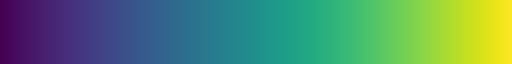

In [ ]:
# Set seaborn themes
sns.set_theme(style='white')
sns.color_palette('viridis', as_cmap=True)

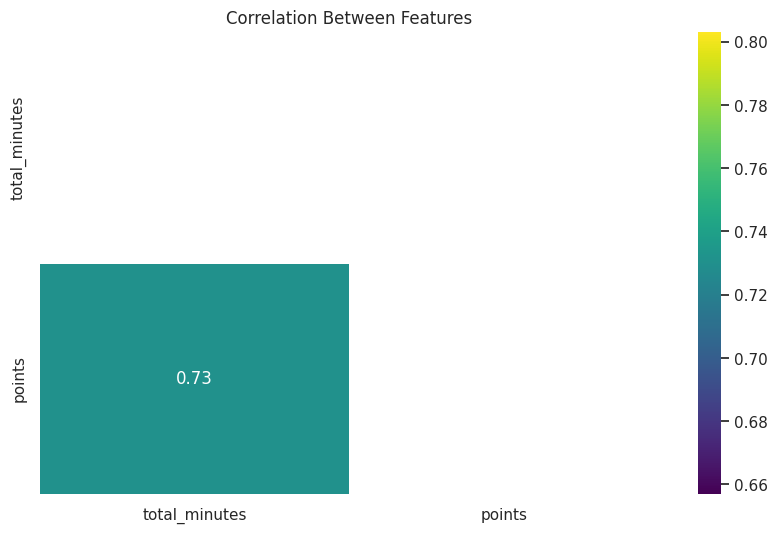

In [ ]:
#To get a correlation matrix
# Ploting the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

# Create the plot
plt.figure(figsize=(10,6))
matrix = correlation_matrix_two_columns
mask = np.triu(np.ones_like(matrix, dtype=float))
sns.heatmap(correlation_matrix_two_columns,
           annot=True,
           linewidths=.5,
           cmap='viridis',
           fmt= '.2f',
           mask=mask)

# Specify the name of the plot
plt.title('Correlation Between Features')
plt.show()